### Loading libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Read text file 

In [5]:
data = pd.read_table("fruit_data_with_colors.txt")

In [6]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Inspecting records for null values

In [7]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

### Selecting Features and Target variables

In [8]:
X = data[['mass','width','height','color_score']]
y = data['fruit_label']

### train, test and split with default 75% & 25% split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### KNeighbors classifer to train model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate accuracy on train records

In [21]:
knn.score(X_train, y_train)

0.7954545454545454

### Estimate accuracy on test records

In [35]:
knn.score(X_test, y_test)

0.5333333333333333

### How different n_neighbors impacting model ?

Text(0,0.5,'score')

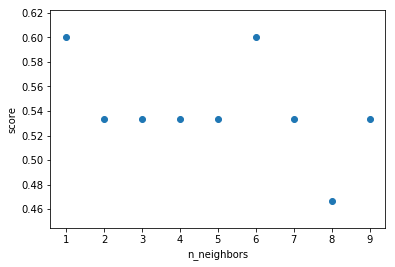

In [41]:
n = range(1,10)
scores =[]

for k in n:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.scatter(n, scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')